# Setup

In [1]:
import pickle
import tensorflow as tf

from util import *
from biomedical_qa.models import model_from_config
from biomedical_qa.sampling.squad import SQuADSampler

import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open("../model_checkpoints/bioasq_finetune_dropout04/config.pickle", 'rb') as f:
    model_config = pickle.load(f)
model = model_from_config(model_config)

In [3]:
rev_vocab = [""] * len(model.embedder.vocab)
for w, i in model.embedder.vocab.items():
    rev_vocab[i] = w

In [4]:
sess = tf.InteractiveSession()
sess.run(tf.initialize_all_variables())
model.model_saver.restore(sess, "../model_checkpoints/bioasq_finetune_dropout04/model.ckpt-3600")
model.set_eval(sess)
sampler = SQuADSampler("../data/BioASQ_squad", ["dev.json"], 1, vocab=model.embedder.vocab)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


# Run Model

In [42]:
b = sampler.get_batch()

start_p, end_p, start_scores, end_scores = model.run(
    sess, [model.predicted_answer_starts, 
           model.predicted_answer_ends,
           model.start_scores,
           model.end_scores], b)

In [43]:
print_question(b, rev_vocab)
print_context(b, rev_vocab)
print_answers(b, rev_vocab)
print_predicted(b, start_p[0], end_p[0], rev_vocab)

Question:
which are the different members / isoforms of the ras oncogenes ?

Context:
the major ras isoforms ( k , h , and n ) mutations in ras isoforms such as k - ras , n - ras , and h - ras contribute to roughly 85 , 15 , and 1 % of human cancers , respectively . the ras isoforms ( h , n and k ) the mutant forms of kras , nras and hras lipidated ras isoforms ( h - ras and n - ras ) : h - ras , k - ras , and n - ras regulate cellular growth and survival and are often activated by somatic mutation in human tumors . human tumours frequently express ras proteins ( ha - , ki - , n - ras ) there are three major ras isoforms : h - , n - and k - ras . all mammalian cells express 3 closely related ras proteins , termed h - ras , k - ras , and n - ras hree closely related isoforms , hras , kras and nras , h - ras , n - ras , and k - ras are canonical ras gene family members frequently activated by point mutation in human cancers and coding for 4 different , highly related protein isoforms ( h

# Pointer Visualization

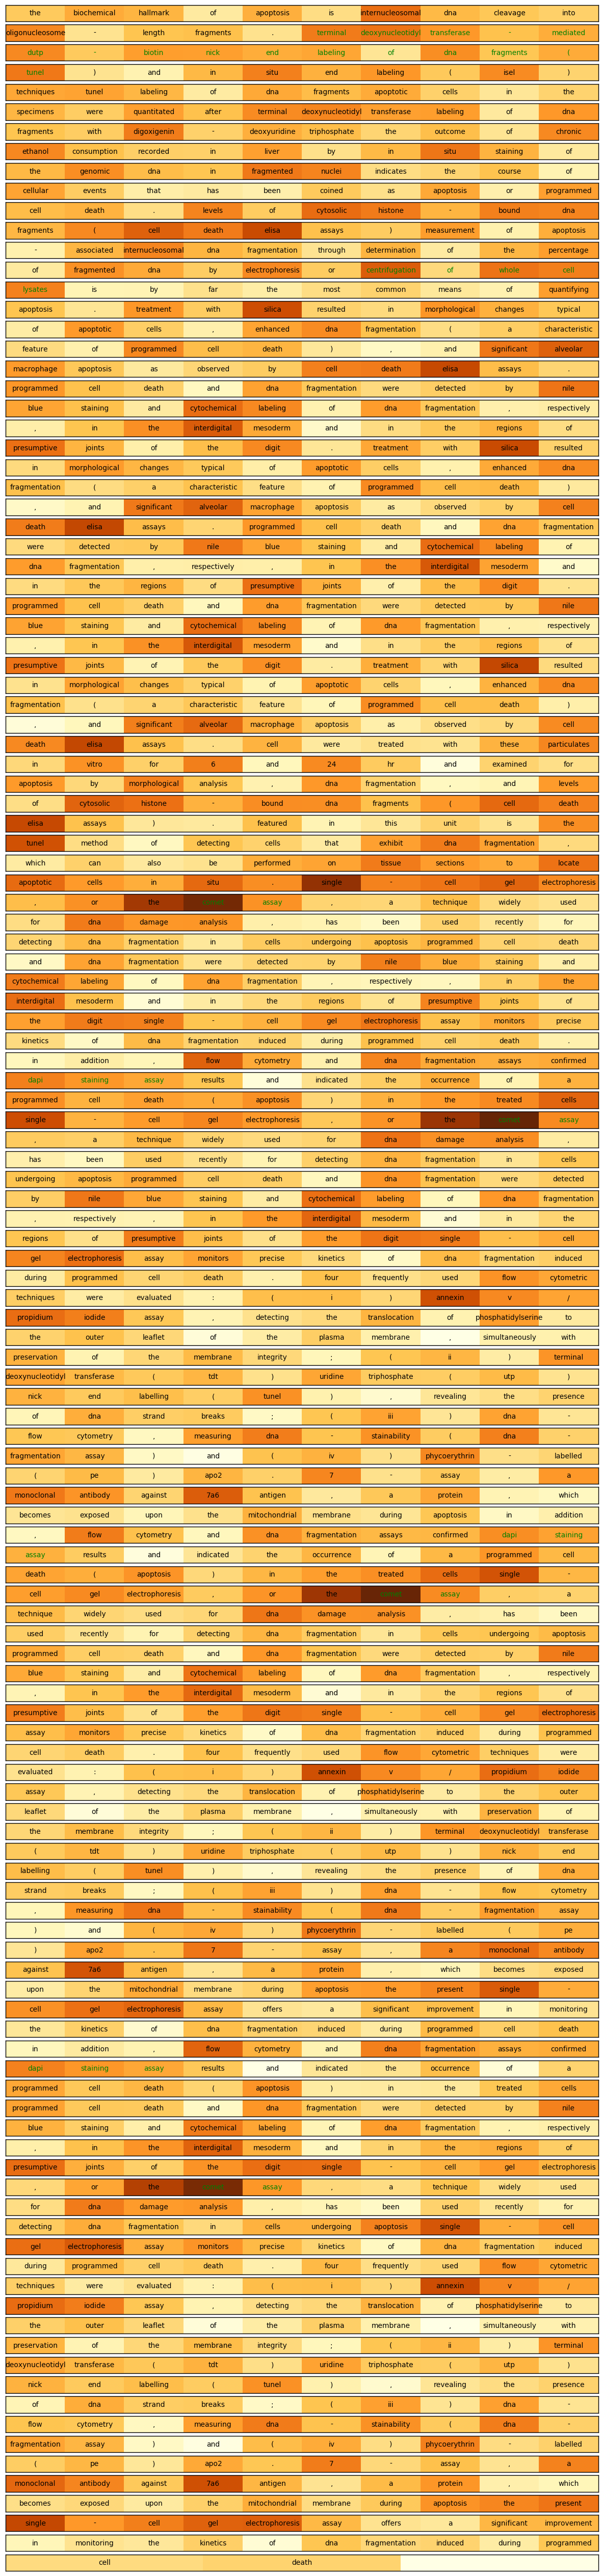

In [23]:
tokens = [rev_vocab[w] for w in b[0].context]
correct_tokens = find_correct_tokens(b)

text_heatmap(tokens, start_scores[-1], correct_tokens)

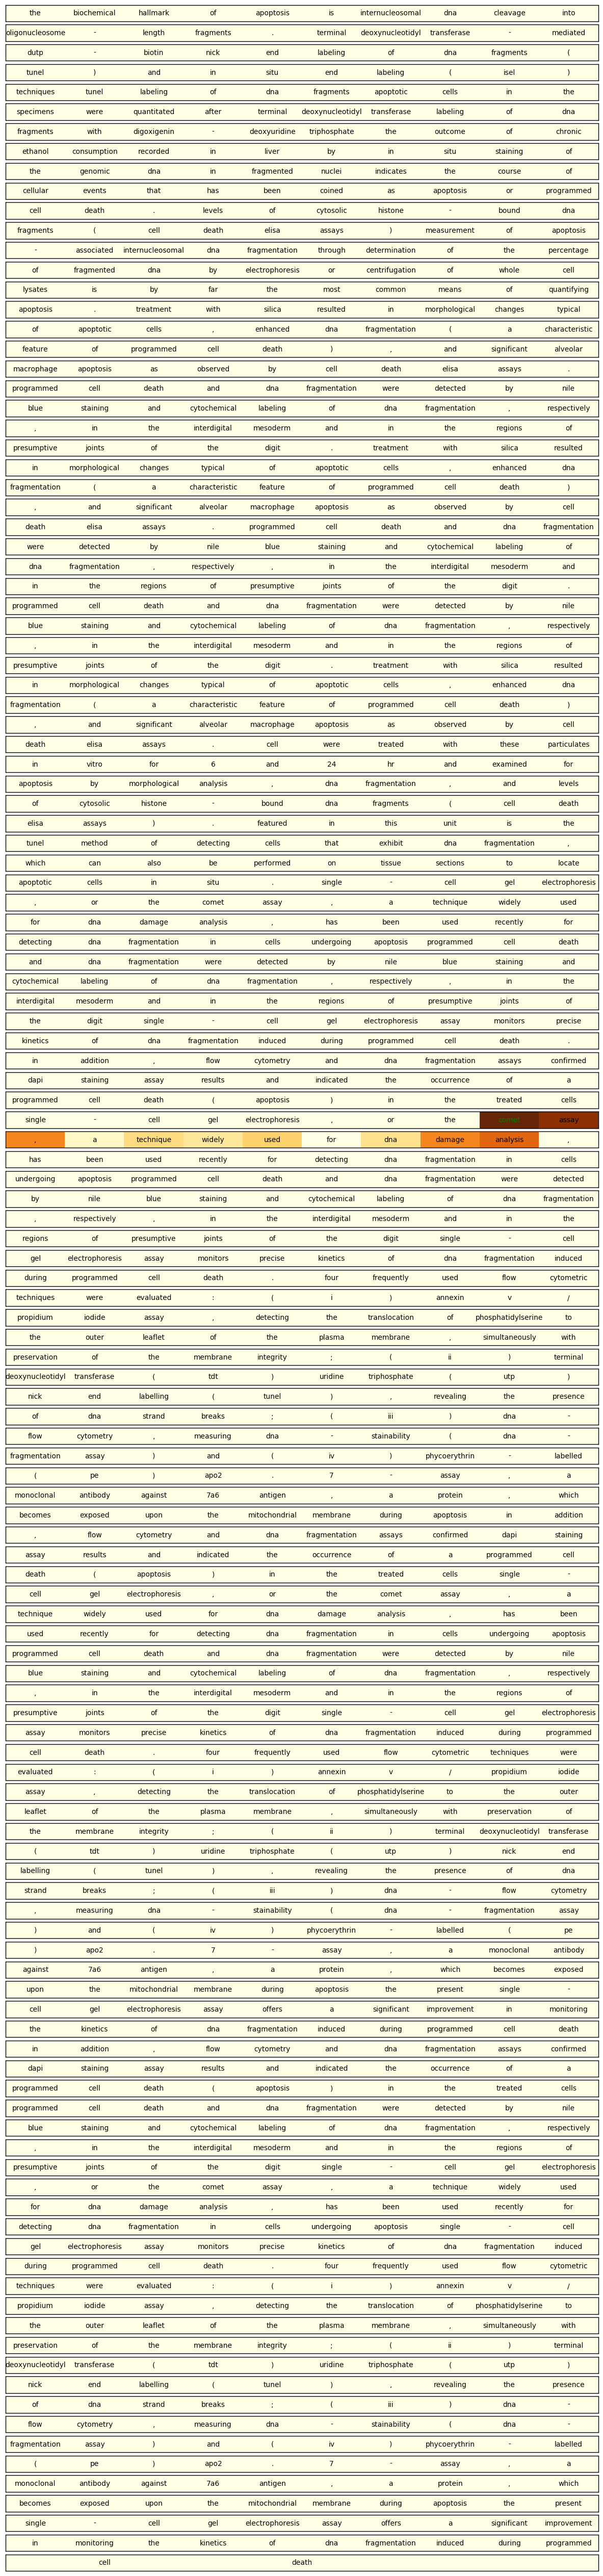

In [24]:
tokens = [rev_vocab[w] for w in b[0].context]
start_token_mask = np.zeros(len(tokens), dtype=np.bool)
start_token_mask[start_p[0]] = True

text_heatmap(tokens, end_scores[-1], start_token_mask)